<a href="https://colab.research.google.com/github/Lavoisier29/Abhinav-Saharan/blob/main/BTPfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Dataset

In [43]:
import pandas as pd
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Read CSV file with space delimiter
df = pd.read_csv('/content/new_data.csv')

# Print the first 5 rows of the data frame
display(df)

Date      Time  latitude  longitude  depth  mag magType  nst  \
0     17-03-2014  05:11:34  -20.0030   -70.8741   17.0  6.2     mww  0.0   
1     16-03-2014  21:16:30  -19.9246   -70.6278   20.0  6.7     mww  0.0   
2     15-03-2014  23:51:30   -5.5660   -80.8790    9.8  6.3     mwp  0.0   
3     15-03-2014  08:59:21  -14.0935   -76.2968   20.0  6.1     mww  0.0   
4     13-03-2014  17:06:50   33.6793   131.8197   79.0  6.3     mwb  0.0   
...          ...       ...       ...        ...    ...  ...     ...  ...   
8308  31-01-1900  19:22:00   48.0000   146.0000  450.0  7.5      mj  0.0   
8309  20-01-1900  06:33:00   20.0000  -105.0000    0.0  7.3      mw  0.0   
8310  18-01-1900  07:46:00   44.5000   148.5000   35.0  6.7      mj  0.0   
8311  11-01-1900  09:07:00   -5.0000   148.0000    0.0  7.0      ms  0.0   
8312  05-01-1900  19:00:00   -3.0000   102.0000    0.0  7.0      ms  0.0   

             net                        id                   updated  \
0             us                usc000ndw9  2014-03-17T14:57:11.000Z   
1             us                usc000ndnj  2014-03-17T18:43:29.249Z   
2             us                usc000nd0c  2014-03-18T17:52:18.000Z   
3             us                usc000ncbl  2014-03-16T05:34:44.387Z   
4             us                usc000nabv  2014-03-17T23:24:32.491Z   
...          ...                       ...                       ...   
8308  centennial  centennial19000131192200  2013-07-09T19:07:15.000Z   
8309  centennial  centennial19000120063300  2013-07-09T19:07:15.000Z   
8310  centennial  centennial19000118074600  2013-07-09T19:07:15.000Z   
8311  centennial  centennial19000111090700  2013-07-09T19:07:15.000Z   
8312  centennial  centennial19000105190000  2013-07-09T19:07:15.000Z   

                                place        type  
0          80km WNW of Iquique, Chile  earthquake  
1          60km WNW of Iquique, Chile  earthquake  
2              6km W of Sechura, Peru  earthquake  
3             25km S of Paracas, Peru  earthquake  
4     15km NNE of Kunisaki-shi, Japan  earthquake  
...                               ...         ...  
8308   northwest of the Kuril Islands  earthquake  
8309                  Jalisco, Mexico  earthquake  
8310                    Kuril Islands  earthquake  
8311                     Bismarck Sea  earthquake  
8312      southern Sumatra, Indonesia  earthquake  

[8313 rows x 13 columns]

In [44]:
# from google.colab import drive
# drive.mount('/content/drive')

##Preprocessing
No preprocessing required because the data is already clean and structured.
We just have to change the column names to meaningful names.

In [45]:
new_column_names = ["Date(YYYY/MM/DD)",  "Time(UTC)", "Latitude(deg)", "Longitude(deg)", "Depth(km)", "Magnitude(ergs)",
                    "Magnitude_type", "No_of_Stations", "Gap", "Close", "RMS", "SRC", "EventID"]

df.columns = new_column_names
ts = pd.to_datetime(df["Date(YYYY/MM/DD)"] + " " + df["Time(UTC)"])
df = df.drop(["Date(YYYY/MM/DD)", "Time(UTC)"], axis=1)
df.index = ts
display(df)

Latitude(deg)  Longitude(deg)  Depth(km)  \
2014-03-17 05:11:34       -20.0030        -70.8741       17.0   
2014-03-16 21:16:30       -19.9246        -70.6278       20.0   
2014-03-15 23:51:30        -5.5660        -80.8790        9.8   
2014-03-15 08:59:21       -14.0935        -76.2968       20.0   
2014-03-13 17:06:50        33.6793        131.8197       79.0   
...                            ...             ...        ...   
1900-01-31 19:22:00        48.0000        146.0000      450.0   
1900-01-20 06:33:00        20.0000       -105.0000        0.0   
1900-01-18 07:46:00        44.5000        148.5000       35.0   
1900-01-11 09:07:00        -5.0000        148.0000        0.0   
1900-01-05 19:00:00        -3.0000        102.0000        0.0   

                     Magnitude(ergs) Magnitude_type  No_of_Stations  \
2014-03-17 05:11:34              6.2            mww             0.0   
2014-03-16 21:16:30              6.7            mww             0.0   
2014-03-15 23:51:30              6.3            mwp             0.0   
2014-03-15 08:59:21              6.1            mww             0.0   
2014-03-13 17:06:50              6.3            mwb             0.0   
...                              ...            ...             ...   
1900-01-31 19:22:00              7.5             mj             0.0   
1900-01-20 06:33:00              7.3             mw             0.0   
1900-01-18 07:46:00              6.7             mj             0.0   
1900-01-11 09:07:00              7.0             ms             0.0   
1900-01-05 19:00:00              7.0             ms             0.0   

                            Gap                     Close  \
2014-03-17 05:11:34          us                usc000ndw9   
2014-03-16 21:16:30          us                usc000ndnj   
2014-03-15 23:51:30          us                usc000nd0c   
2014-03-15 08:59:21          us                usc000ncbl   
2014-03-13 17:06:50          us                usc000nabv   
...                         ...                       ...   
1900-01-31 19:22:00  centennial  centennial19000131192200   
1900-01-20 06:33:00  centennial  centennial19000120063300   
1900-01-18 07:46:00  centennial  centennial19000118074600   
1900-01-11 09:07:00  centennial  centennial19000111090700   
1900-01-05 19:00:00  centennial  centennial19000105190000   

                                          RMS  \
2014-03-17 05:11:34  2014-03-17T14:57:11.000Z   
2014-03-16 21:16:30  2014-03-17T18:43:29.249Z   
2014-03-15 23:51:30  2014-03-18T17:52:18.000Z   
2014-03-15 08:59:21  2014-03-16T05:34:44.387Z   
2014-03-13 17:06:50  2014-03-17T23:24:32.491Z   
...                                       ...   
1900-01-31 19:22:00  2013-07-09T19:07:15.000Z   
1900-01-20 06:33:00  2013-07-09T19:07:15.000Z   
1900-01-18 07:46:00  2013-07-09T19:07:15.000Z   
1900-01-11 09:07:00  2013-07-09T19:07:15.000Z   
1900-01-05 19:00:00  2013-07-09T19:07:15.000Z   

                                                 SRC     EventID  
2014-03-17 05:11:34       80km WNW of Iquique, Chile  earthquake  
2014-03-16 21:16:30       60km WNW of Iquique, Chile  earthquake  
2014-03-15 23:51:30           6km W of Sechura, Peru  earthquake  
2014-03-15 08:59:21          25km S of Paracas, Peru  earthquake  
2014-03-13 17:06:50  15km NNE of Kunisaki-shi, Japan  earthquake  
...                                              ...         ...  
1900-01-31 19:22:00   northwest of the Kuril Islands  earthquake  
1900-01-20 06:33:00                  Jalisco, Mexico  earthquake  
1900-01-18 07:46:00                    Kuril Islands  earthquake  
1900-01-11 09:07:00                     Bismarck Sea  earthquake  
1900-01-05 19:00:00      southern Sumatra, Indonesia  earthquake  

[8313 rows x 11 columns]

In [52]:
print(df.head())

                     Latitude(deg)  Longitude(deg)  Depth(km)  \
2014-03-17 05:11:34       -20.0030        -70.8741       17.0   
2014-03-16 21:16:30       -19.9246        -70.6278       20.0   
2014-03-15 23:51:30        -5.5660        -80.8790        9.8   
2014-03-15 08:59:21       -14.0935        -76.2968       20.0   
2014-03-13 17:06:50        33.6793        131.8197       79.0   

                     Magnitude(ergs) Magnitude_type  No_of_Stations Gap  \
2014-03-17 05:11:34              6.2            mww             0.0  us   
2014-03-16 21:16:30              6.7            mww             0.0  us   
2014-03-15 23:51:30              6.3            mwp             0.0  us   
2014-03-15 08:59:21              6.1            mww             0.0  us   
2014-03-13 17:06:50              6.3            mwb             0.0  us   

                          Close                       RMS  \
2014-03-17 05:11:34  usc000ndw9  2014-03-17T14:57:11.000Z   
2014-03-16 21:16:30  usc000ndnj  201

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8313 entries, 2014-03-17 05:11:34 to 1900-01-05 19:00:00
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude(deg)    8313 non-null   float64
 1   Longitude(deg)   8313 non-null   float64
 2   Depth(km)        8313 non-null   float64
 3   Magnitude(ergs)  8312 non-null   float64
 4   Magnitude_type   8298 non-null   object 
 5   No_of_Stations   8197 non-null   float64
 6   Gap              8313 non-null   object 
 7   Close            8313 non-null   object 
 8   RMS              8313 non-null   object 
 9   SRC              8304 non-null   object 
 10  EventID          8313 non-null   object 
dtypes: float64(5), object(6)
memory usage: 779.3+ KB


In [57]:
print(df.isnull().sum())

Latitude(deg)        0
Longitude(deg)       0
Depth(km)            0
Magnitude(ergs)      0
Magnitude_type      14
No_of_Stations     115
Gap                  0
Close                0
RMS                  0
SRC                  9
EventID              0
dtype: int64


In [60]:

df = df.dropna(subset=['Magnitude(ergs)', 'Magnitude_type', 'No_of_Stations'])


In [61]:
print(df.isnull().sum())

Latitude(deg)      0
Longitude(deg)     0
Depth(km)          0
Magnitude(ergs)    0
Magnitude_type     0
No_of_Stations     0
Gap                0
Close              0
RMS                0
SRC                9
EventID            0
dtype: int64


##Export Preprocessed dataset
Export the data into xlsx file

In [62]:
file_name = 'new_data_processed.xlsx'

# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [63]:
import warnings
warnings.filterwarnings('ignore')

##Partition the data into Training and Testing data

In [64]:
from sklearn.model_selection import train_test_split

# Select relevant columns
X = df[['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations']]
y = df['Magnitude(ergs)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##Linear regression

<h3>Loading the model and fitting it with training data</h3>

In [65]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

<h3>Predict the testing data</h3>
Find the predicted values and evaluate it using metrics of linear regression

In [66]:
from sklearn.metrics import r2_score, mean_squared_error

scores= {"Model name": ["Linear regression", "SVM", "Random Forest"], "mse": []}

# Predict on the testing set
y_pred = regressor.predict(X_test)

# Compute R^2 and MSE
# r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

scores['mse'].append(mse)
# scores['R^2'].append(r2)

print("MSE: {:.2f}".format(mse))

MSE: 0.21


<h3>Predict for new data</h3>



In [67]:
# Predict on new data
new_data = [[36.948, -121.452, 6.81, 21]]
new_pred = regressor.predict(new_data)
print("New predictions:", new_pred)

New predictions: [6.73804345]


<h3>Plot multiple linear regression model</h3>

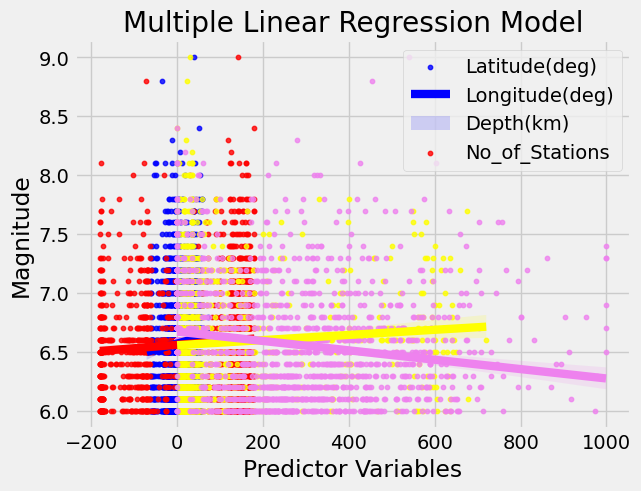

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the regression line
sns.regplot(x=X_test['Latitude(deg)'], y=y_test, color='blue', scatter_kws={'s': 10})
sns.regplot(x=X_test['Longitude(deg)'], y=y_test, color='red', scatter_kws={'s': 10})
sns.regplot(x=X_test['Depth(km)'], y=y_test, color='yellow', scatter_kws={'s': 10})
sns.regplot(x=X_test['No_of_Stations'], y=y_test, color='violet', scatter_kws={'s': 10})
plt.legend(labels=['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations'])
plt.xlabel('Predictor Variables')
plt.ylabel('Magnitude')
plt.title('Multiple Linear Regression Model')
plt.show()

##SVM

<h3>Loading the model and fitting it with training data</h3>

In [69]:
from sklearn.svm import SVR

# Select a subset of the training data
subset_size = 500
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Create an SVM model
svm = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Train the SVM model on the subset of data
svm.fit(X_train_subset, y_train_subset)

# Evaluate the model on the test set
score = svm.score(X_test, y_test)
print("Test score:", score)

Test score: 0.0030197455094198578


<h3>Predict the testing data</h3>
Find the predicted values and evaluate it using metrics like MSE, r2

In [70]:
# Predict on the testing set
y_pred_svm = svm.predict(X_test)

# Compute R^2 and MSE
# r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

scores['mse'].append(mse_svm)
# scores['R^2'].append(r2_svm)

print("MSE: {:.2f}".format(mse_svm))

MSE: 0.22


<h3>Predict for new data</h3>



In [71]:
# Predict on new data
new_pred_svm = svm.predict(new_data)
print("New SVM predictions:", new_pred_svm)

New SVM predictions: [6.6086801]


In [74]:
unique_values = df['Magnitude_type'].unique()

print("Unique values in 'Magnitude Type':")
print(unique_values)

Unique values in 'Magnitude Type':
['mww' 'mwp' 'mwb' 'Mw' 'mwc' 'Mwb' 'Mww' 'Mwp' 'Mt' 'Mwc' 'mb' 'ms' 'mwr'
 'mw' 'uk' 'mj']


<h3>Plot model</h3>

Dataset Head:
                     Latitude(deg)  Longitude(deg)  Depth(km)  \
2014-03-17 05:11:34       -20.0030        -70.8741       17.0   
2014-03-16 21:16:30       -19.9246        -70.6278       20.0   
2014-03-15 23:51:30        -5.5660        -80.8790        9.8   
2014-03-15 08:59:21       -14.0935        -76.2968       20.0   
2014-03-13 17:06:50        33.6793        131.8197       79.0   

                     Magnitude(ergs) Magnitude_type  No_of_Stations Gap  \
2014-03-17 05:11:34              6.2            mww             0.0  us   
2014-03-16 21:16:30              6.7            mww             0.0  us   
2014-03-15 23:51:30              6.3            mwp             0.0  us   
2014-03-15 08:59:21              6.1            mww             0.0  us   
2014-03-13 17:06:50              6.3            mwb             0.0  us   

                          Close                       RMS  \
2014-03-17 05:11:34  usc000ndw9  2014-03-17T14:57:11.000Z   
2014-03-16 21:16:30  u

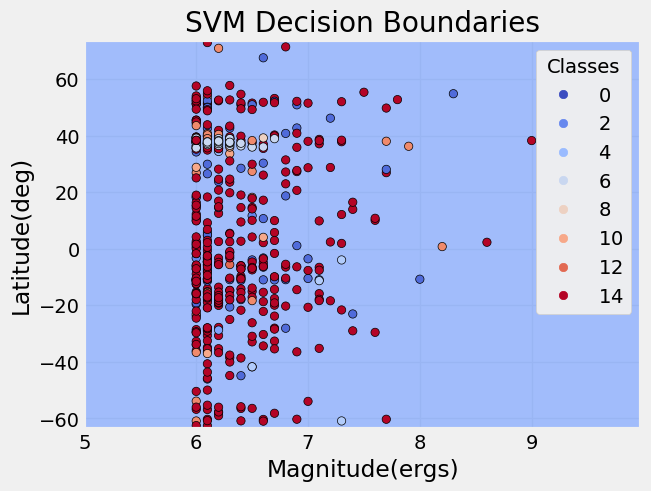

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

style.use('fivethirtyeight')

# Load the dataset

# Check the dataset structure
print("Dataset Head:")
print(df.head())

# Encode 'Magnitude Type' into numerical labels
le = LabelEncoder()
df['Magnitude_type'] = le.fit_transform(df['Magnitude_type'])
print(dict(zip(le.classes_, range(len(le.classes_)))))

# Subset the data for SVM
subset_size = 500  # Adjust as needed
df_subset = df[['Magnitude(ergs)', 'Latitude(deg)', 'Magnitude_type']][:subset_size].dropna()

# Extract features and classes
features = df_subset[['Magnitude(ergs)', 'Latitude(deg)']].values
classes = df_subset['Magnitude_type'].values

# Create and train an SVM with an RBF kernel
svm = SVC(kernel='rbf', gamma='scale', C=1.0)
svm.fit(features, classes)

# Create a mesh grid for plotting decision boundaries
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Plot the decision boundaries and data points
fig, ax = plt.subplots()
X0, X1 = features[:, 0], features[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

# Scatter plot of data points
scatter = ax.scatter(X0, X1, c=classes, cmap=plt.cm.coolwarm, edgecolors='k')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

ax.set_title("SVM Decision Boundaries")
ax.set_xlabel("Magnitude(ergs)")
ax.set_ylabel("Latitude(deg)")
plt.show()


In [78]:
print(df.columns)
df['Magnitude_type'].unique()

Index(['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'Magnitude(ergs)',
       'Magnitude_type', 'No_of_Stations', 'Gap', 'Close', 'RMS', 'SRC',
       'EventID'],
      dtype='object')


array([14, 12, 10,  1, 11,  2,  5,  4,  0,  3,  6,  8, 13,  9, 15,  7])

##Random Forest

<h3>Loading the model and fitting it with training data</h3>

In [79]:
print(df.columns)

Index(['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'Magnitude(ergs)',
       'Magnitude_type', 'No_of_Stations', 'Gap', 'Close', 'RMS', 'SRC',
       'EventID'],
      dtype='object')


In [80]:
# from sklearn.model_selection import train_test_split

# # Select relevant columns
# X = df[['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations']]
# y = df['Magnitude(ergs)']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor

# Initialize a random forest regressor with 100 trees
rf = RandomForestRegressor(random_state=42)

# Fit the regressor to the training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

<h3>Predict the testing data and evaluate it</h3>
Find the predicted values and evaluate it using metrics like MSE, r2

In [81]:
# Predict the target variable on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model using mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

scores['mse'].append(mse)
# scores['R^2'].append(r2)

print('Mean Squared Error: ', mse)
# print('R^2 Score: ', r2)

Mean Squared Error:  0.1828495883573982


<h3>Plot model</h3>

**Scatter plot**

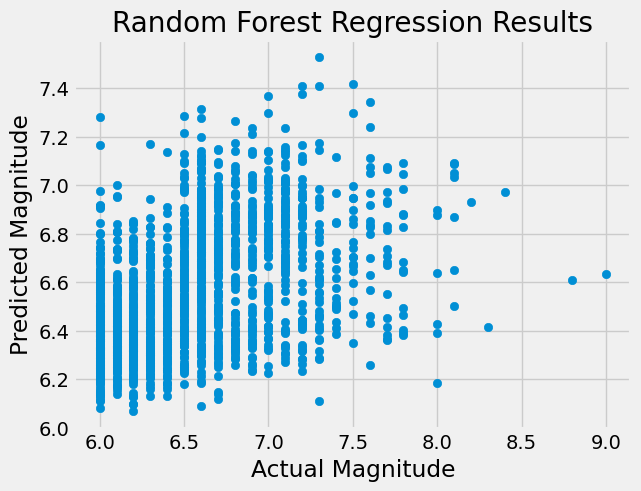

In [82]:
# Plot the predicted and actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Random Forest Regression Results')
plt.show()

**Feature Importance**<br>
This plot shows the importance of each feature in the model. You can create a feature importance plot using the feature_importances_ attribute of the random forest model.

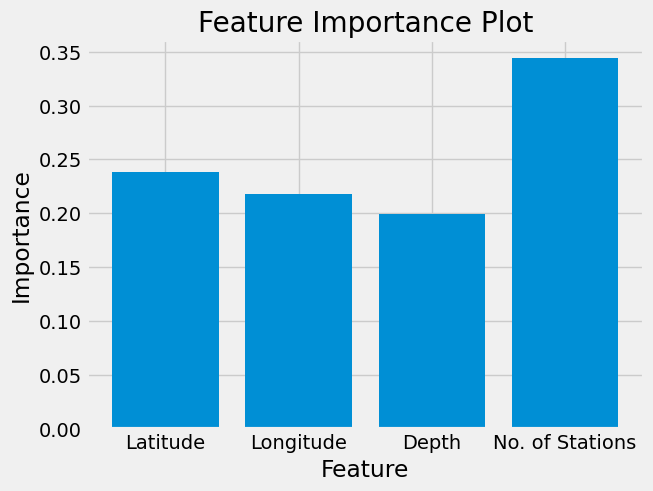

In [83]:
importances = rf.feature_importances_
features = ['Latitude', 'Longitude', 'Depth', 'No. of Stations']
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()

**Residual Plot**<br>
A residual plot shows the difference between the actual values and the predicted values. You can create a residual plot using the residplot() function from the seaborn library.

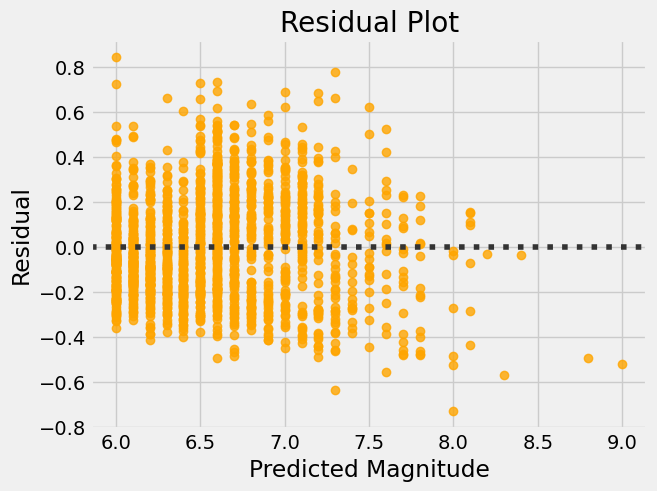

In [84]:
import seaborn as sns
sns.residplot(x= y_test, y =y_pred, color='orange')
plt.xlabel('Predicted Magnitude')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

**Actual vs. Predicted Line Plot**<br>
Actual vs. Predicted Line Plot: A line plot can be used to show the trend of the actual and predicted values over time (if the data is time-series). You can create a line plot using the plot() function.

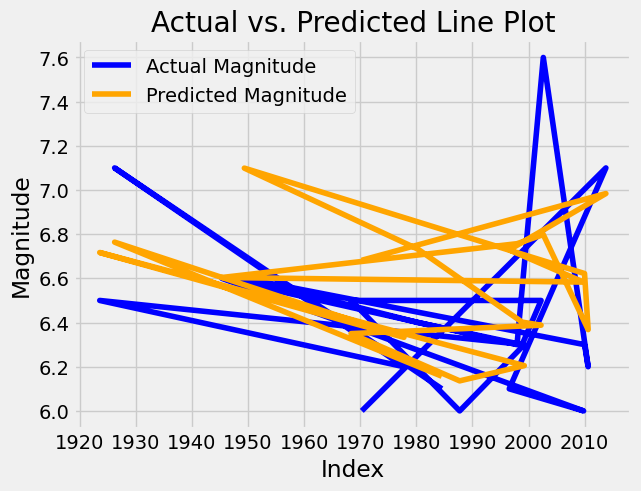

In [85]:
plt.plot(y_test.index[:20], y_test[:20], color='blue', label='Actual Magnitude')
plt.plot(y_test.index[:20], y_pred[:20], color='orange', label='Predicted Magnitude')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.title('Actual vs. Predicted Line Plot')
plt.legend()
plt.show()

<h2>Concluding the accurate model</h2>

In [86]:
for key, value in scores.items():
    print(f"{key}: Length = {len(value)}")


Model name: Length = 3
mse: Length = 3


In [87]:
scores_df = pd.DataFrame(scores)
display(scores_df)

Model name       mse
0  Linear regression  0.210078
1                SVM  0.218977
2      Random Forest  0.182850

In [88]:
scores_df[scores_df["mse"] == scores_df["mse"].min()]

Model name      mse
2  Random Forest  0.18285

In [ ]:
# scores_df[scores_df["R^2"] == scores_df["R^2"].max()]

From the above result we can conclude that random forest is the most accurate model for predicting the magnitude of Earthquake compared to all other models used in this project.